# CMSC 320 Project 1

Name: Raghav Gupta


In [217]:
# importing all the import libraries required for the project
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt

# Part 1: Data scraping and preparation

In [218]:
# Step 1: Scrape your competitor's data
solar_url = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares" )
solar_html = bs(solar_url.content)
table = solar_html.find("table")
pretty_table = table.prettify()

In [219]:
data = pd.read_html(pretty_table)     
data[0].columns = ['rank', 'solar_cycle', 'date', 'region', 'start', 'maximum', 'end', 'movie archive']
print data[0].head()

   rank solar_cycle        date  region  start maximum    end  \
0     1       X28.0  2003/11/04     486  19:29   19:53  20:06   
1     2       X20.0  2001/04/02    9393  21:32   21:51  22:03   
2     3       X17.2  2003/10/28     486  09:51   11:10  11:24   
3     4       X17.0  2005/09/07     808  17:17   17:40  18:03   
4     5       X14.4  2001/04/15    9415  13:19   13:50  13:55   

         movie archive  
0  Movie  View archive  
1  Movie  View archive  
2  Movie  View archive  
3  Movie  View archive  
4  Movie  View archive  


# Step 2: Tidy the solar flare data 

In [220]:
del data[0]['movie archive']
print data[0].head()

   rank solar_cycle        date  region  start maximum    end
0     1       X28.0  2003/11/04     486  19:29   19:53  20:06
1     2       X20.0  2001/04/02    9393  21:32   21:51  22:03
2     3       X17.2  2003/10/28     486  09:51   11:10  11:24
3     4       X17.0  2005/09/07     808  17:17   17:40  18:03
4     5       X14.4  2001/04/15    9415  13:19   13:50  13:55


In [221]:
# combining separate data and time columns 
c = ['start','maximum','end']
for x in c:
    data[0][x] = pd.to_datetime(data[0]['date'] + ' ' + data[0][x])
del data[0]['date']
print data[0].head()

   rank solar_cycle  region               start             maximum  \
0     1       X28.0     486 2003-11-04 19:29:00 2003-11-04 19:53:00   
1     2       X20.0    9393 2001-04-02 21:32:00 2001-04-02 21:51:00   
2     3       X17.2     486 2003-10-28 09:51:00 2003-10-28 11:10:00   
3     4       X17.0     808 2005-09-07 17:17:00 2005-09-07 17:40:00   
4     5       X14.4    9415 2001-04-15 13:19:00 2001-04-15 13:50:00   

                  end  
0 2003-11-04 20:06:00  
1 2001-04-02 22:03:00  
2 2003-10-28 11:24:00  
3 2005-09-07 18:03:00  
4 2001-04-15 13:55:00  


In [222]:
data[0] = data[0].replace('-', np.NaN)
print(data[0]).head()

   rank solar_cycle  region               start             maximum  \
0     1       X28.0     486 2003-11-04 19:29:00 2003-11-04 19:53:00   
1     2       X20.0    9393 2001-04-02 21:32:00 2001-04-02 21:51:00   
2     3       X17.2     486 2003-10-28 09:51:00 2003-10-28 11:10:00   
3     4       X17.0     808 2005-09-07 17:17:00 2005-09-07 17:40:00   
4     5       X14.4    9415 2001-04-15 13:19:00 2001-04-15 13:50:00   

                  end  
0 2003-11-04 20:06:00  
1 2001-04-02 22:03:00  
2 2003-10-28 11:24:00  
3 2005-09-07 18:03:00  
4 2001-04-15 13:55:00  


# Step 3: Scrape the NASA data

In [223]:
nasa_url = requests.get("http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html" )  
nasa_html = bs(nasa_url.content, 'html')
text = nasa_html.get_text()         
split_text = text.split('\n')[15:-4] 

d = []
for l in split_text:
    a = l.split()
    d.append(a)
data2 = pd.DataFrame(d) 

for i in range(15,24):
    del data2[i]
data2.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 
                 'end_frequency', 'flare_location', 'flare_region','flare_classification',
                 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed','plots']
    
print(data2).head(5)

   start_date start_time end_date end_time start_frequency end_frequency  \
0  1997/04/01      14:00    04/01    14:15            8000          4000   
1  1997/04/07      14:30    04/07    17:30           11000          1000   
2  1997/05/12      05:15    05/14    16:00           12000            80   
3  1997/05/21      20:20    05/21    22:00            5000           500   
4  1997/09/23      21:53    09/23    22:16            6000          2000   

  flare_location flare_region flare_classification cme_date cme_time  \
0         S25E16         8026                 M1.3    04/01    15:18   
1         S28E19         8027                 C6.8    04/07    14:27   
2         N21W08         8038                 C1.3    05/12    05:30   
3         N05W12         8040                 M1.3    05/21    21:00   
4         S29E25         8088                 C1.4    09/23    22:02   

  cme_angle cme_width cme_speed plots  
0        74        79       312  PHTX  
1      Halo       360       87

# Step 4: Tidy the NASA the table

In [224]:
data2['start_frequency'] = data2['start_frequency'].replace('????', np.NaN)
data2['end_frequency'] = data2['end_frequency'].replace('????', np.NaN)
data2['flare_location'] = data2['flare_location'].replace('------',np.NaN)

data2['flare_region'] = data2['flare_region'].replace('-----',np.NaN)
data2['flare_classification'] = data2['flare_classification'].replace('FILA',np.NaN)
data2['cme_date'] = data2['cme_date'].replace('--/--',np.NaN)
data2['cme_time'] = data2['cme_time'].replace('--:--',np.NaN)
data2['cme_width'] = data2['cme_width'].replace('---',np.NaN)

val=['flare_classification','cme_angle','cme_width','cme_speed']
for i in val:
    data2[i] = data2[i].replace('----',np.NaN)
data2['is_halo'] = data2['cme_angle'] == 'Halo'
data2['cme_angle'] = data2['cme_angle'].replace('Halo','NA')

data2['width_lower_bound'] = data2['cme_width'].apply(lambda x : str(x).find('>')==0)
data2['cme_width'] = data2['cme_width'].apply(lambda x : str(x).replace('>',''))
data2['cme_width'] = data2['cme_width'].apply(lambda x : str(x).replace('h',''))
# year to be added 
data2['start_datetime'] = (data2['start_date'] + ' ' + data2['start_time'])
data2['end_datetime'] = (data2['end_date'] + ' ' + data2['end_time'])
data2['cme_datetime'] = (data2['cme_date'] + ' ' + data2['cme_time'])

t = ['start_date','end_date','cme_date','end_time','cme_time','start_time']
for v in t:
    del data2[v]

data2 = data2[['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location',
         'flare_region', 'flare_classification', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed','plots', 
         'is_halo', 'width_lower_bound']]
print data2

       start_datetime end_datetime start_frequency end_frequency  \
0    1997/04/01 14:00  04/01 14:15            8000          4000   
1    1997/04/07 14:30  04/07 17:30           11000          1000   
2    1997/05/12 05:15  05/14 16:00           12000            80   
3    1997/05/21 20:20  05/21 22:00            5000           500   
4    1997/09/23 21:53  09/23 22:16            6000          2000   
5    1997/11/03 05:15  11/03 12:00           14000           250   
6    1997/11/03 10:30  11/03 11:30           14000          5000   
7    1997/11/04 06:00  11/05 04:30           14000           100   
8    1997/11/06 12:20  11/07 08:30           14000           100   
9    1997/11/27 13:30  11/27 14:00           14000          7000   
10   1997/12/12 22:45  12/12 23:20           14000          8000   
11   1998/01/25 15:03  01/25 15:18           14000         10000   
12   1998/03/29 03:40  03/29 03:52           14000          7000   
13   1998/04/20 10:25  04/22 06:00           100

In [225]:
data2.describe()

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound
count,482,482,476,476,476,399,376,462,461,482,462,482,482,482
unique,482,481,46,77,396,228,175,461,134,139,406,1,2,2
top,2014/01/20 22:24,10/29 24:00,14000,1000,BACK,9415,X1.2,07/14 10:54,NA,360,964,PHTX,True,False
freq,1,2,199,34,21,8,9,2,264,264,3,482,264,451


# Part 2: Analysis
1. Data Replication

In [226]:
replication_data = pd.DataFrame(data2)
score = []
for x,y in data2.iterrows():
    if(str(y['flare_classification']).find('M')==0):
            score.append((pow(10,-5)) * float(y['flare_classification'][1:]))
    elif(str(y['flare_classification']).find('X')==0):
            score.append((pow(10,-4)) * float(y['flare_classification'][1:]))
    elif(str(y['flare_classification']).find('C')==0):
            score.append((pow(10,-6)) * float(y['flare_classification'][1:]))
    elif (str(y['flare_classification']).find('B')==0):
            score.append((pow(10,-7)) * float(y['flare_classification'][1:]))
    else:
        score.append(0.0)
replication_data['flare_intensity'] = score
replication_data = replication_data.sort_values(['flare_intensity'],ascending = False)
del replication_data['width_lower_bound']
print replication_data

       start_datetime end_datetime start_frequency end_frequency  \
242  2003/11/04 20:00  11/04 24:00           10000           200   
119  2001/04/02 22:05  04/03 02:30           14000           250   
234  2003/10/28 11:10  10/29 24:00           14000            40   
128  2001/04/15 14:05  04/16 13:00           14000            40   
235  2003/10/29 20:55  10/29 24:00           11000           500   
8    1997/11/06 12:20  11/07 08:30           14000           100   
330  2006/12/05 10:50  12/05 20:00           14000           250   
238  2003/11/02 17:30  11/03 01:00           12000           250   
290  2005/01/20 07:15  01/20 16:30           14000            25   
360  2011/08/09 08:20  08/09 08:35           16000          4000   
333  2006/12/06 19:00  12/08 24:00           16000            30   
319  2005/09/09 19:45  09/09 22:00           10000            50   
83   2000/07/14 10:30  07/15 14:30           14000            80   
123  2001/04/06 19:35  04/07 01:50           140

You cannot replicate the data well. We tried converting the solar classifications to flare intensity but it still won't match up. Matching it with respect to other variables won't make sense since they are not a dependent variable.

# Part 2.2: Data Integration

In [274]:
integration_data = data2
score = []
for x,y in data[0].iterrows():
    if isinstance(y['solar_cycle'], str):
        if(str(y['solar_cycle']).find('M')==0):
            score.append((pow(10,-5)) * float(y['solar_cycle'][1:]))
        elif(str(y['solar_cycle']).find('X')==0):
            score.append((pow(10,-4)) * float(y['solar_cycle'][1:]))
        elif(str(y['solar_cycle']).find('C')==0):
            score.append((pow(10,-6)) * float(y['solar_cycle'][1:]))
        elif (str(y['solar_cycle']).find('B')==0):
            score.append((pow(10,-7)) * float(y['solar_cycle'][1:]))
    else:
        score.append(0.0)
data[0]['flare_intensity'] = score
count = 0
integration_data['diff'] = 'None'

for a, b in data[0].iterrows():
    abs_diff = []
    abs_diffe = []
    for x, y in integration_data.iterrows():
        abs_diff.append(abs(b['flare_intensity'] - y['flare_intensity']))
        abs_diffe.append(str(b['region']) == str((y['flare_region'])))
integration_data['diff'] = abs_diff
integration_data['diffe'] = abs_diffe
integration_data.sort_values(['diff'])
for x, y in integration_data.iterrows():
    if y['diff']==0:
        count = count+1
#print str(count) + " rows that are best matched"
print integration_data.query('diff == 0'and 'diffe == True')

     start_datetime end_datetime start_frequency end_frequency flare_location  \
9  1997/11/27 13:30  11/27 14:00           14000          7000         N17E63   

  flare_region flare_classification cme_datetime cme_angle cme_width  \
9         8113                 X2.6  11/27 13:56        98        91   

  cme_speed plots  is_halo  width_lower_bound  flare_intensity  diff  diffe  
9       441  PHTX    False              False          0.00026   0.0   True  


We took flare intensity and flare region to be the criteria to pick the matching the best pick row. We compared the values for both variables in data[0] or solar flare and data2 or the NASA data. The solar flare on 1997/11/27 13:30 came out to be the common one.

# Part 2.3: Data Analysis

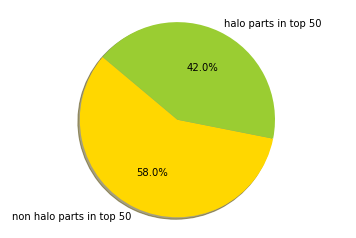

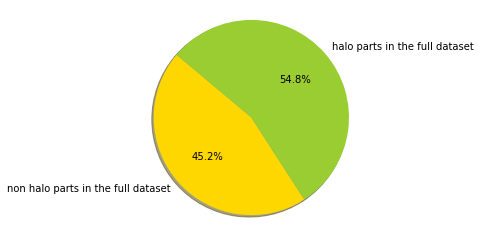

In [228]:
val = 0
for x,y in data2.iterrows():
    if y['is_halo']:
        val += 1
val2 = 0
for x,y in data2.head(50).iterrows():
    if y['is_halo']:
        val2 += 1
        
non_halo_f = 50-val2
non_halo = 482-val

# Data to plot
labels = 'non halo parts in top 50', 'halo parts in top 50'
sizes = [non_halo_f, val2]
colors = ['gold', 'yellowgreen']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


# Data to plot
labels = 'non halo parts in the full dataset', 'halo parts in the full dataset'
sizes = [non_halo,val]
colors = ['gold', 'yellowgreen']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


Here with these pie charts we can see that there were more non halo parts in the top 50 than in the whole dataset and hence conclude that solar flare in top 50 do not tend to have more halo CMEs.